<a href="https://colab.research.google.com/github/zooodung/Face_Image_Emotion_Classification/blob/JS/FP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from matplotlib.colors import ListedColormap

In [ ]:
#TRAIN_JSON_PATH = '/content/Data/label/train/'
TRAIN_JSON_PATH = '/content/'
#VALID_JSON_PATH = '/content/Data/label/val/'

#TRAIN_IMG_PATH = '/content/Data/img/train/'
#VALID_IMG_PATH = '/content/Data/img/val/'

TRAIN_SEGMENT_PATH = '/content/'
#VALID_SEGMENT_PATH = '/content/Data/segmentation/val/'

### Label

In [ ]:
with open (TRAIN_JSON_PATH + "train_anger.json", "r", encoding='euc-kr') as f:
    anger_label = json.load(f)
with open (TRAIN_JSON_PATH + "train_happy.json", "r", encoding='euc-kr') as f:
    happy_label = json.load(f)
with open (TRAIN_JSON_PATH + "train_panic.json", "r", encoding='euc-kr') as f:
    panic_label = json.load(f)
with open (TRAIN_JSON_PATH + "train_sadness.json", "r", encoding='euc-kr') as f:
    sadness_label = json.load(f)

In [ ]:
anger_label[116]

{'filename': 'wky3958474ae5735a8a3fe0729952cf0e042584c3f37ec4f709ceef4121448l5o.jpg',
 'gender': '여',
 'age': 20,
 'isProf': '일반인',
 'faceExp_uploader': '분노',
 'bg_uploader': '교통/이동수단(엘리베이터 포함)',
 'annot_A': {'boxes': {'maxX': 2489.985145935132,
   'maxY': 1179.8747768099136,
   'minX': 1665.959563855069,
   'minY': 356.10977493833894},
  'faceExp': '상처',
  'bg': '교통/이동수단(엘리베이터 포함)'},
 'annot_B': {'boxes': {'maxX': 2489.9976,
   'maxY': 1156.9716,
   'minX': 1669.1569,
   'minY': 199.26469999999998},
  'faceExp': '분노',
  'bg': '교통/이동수단(엘리베이터 포함)'},
 'annot_C': {'boxes': {'maxX': 2489.9976,
   'maxY': 1156.9716,
   'minX': 1669.1569,
   'minY': 199.2647},
  'faceExp': '불안',
  'bg': '교통/이동수단(엘리베이터 포함)'}}

In [ ]:
anger_label[0].keys()

dict_keys(['filename', 'gender', 'age', 'isProf', 'faceExp_uploader', 'bg_uploader', 'annot_A', 'annot_B', 'annot_C'])

In [ ]:
print(len(anger_label))
print(len(happy_label))
print(len(panic_label))
print(len(sadness_label))

1500
1494
1500
1500


In [ ]:
anger_label_df = pd.DataFrame(anger_label)
happy_label_df = pd.DataFrame(happy_label)
panic_label_df = pd.DataFrame(panic_label)
sadness_label_df = pd.DataFrame(sadness_label)

In [ ]:
print("anger\n", anger_label_df.describe())
print("------------------")
print("happy\n", happy_label_df.describe())
print("------------------")
print("panic\n", panic_label_df.describe())
print("------------------")
print("sadness\n", sadness_label_df.describe())

anger
                age
count  1500.000000
mean     26.333333
std       7.962275
min      10.000000
25%      20.000000
50%      20.000000
75%      30.000000
max      60.000000
------------------
happy
                age
count  1494.000000
mean     26.392236
std       8.251495
min      10.000000
25%      20.000000
50%      20.000000
75%      30.000000
max      50.000000
------------------
panic
                age
count  1500.000000
mean     26.253333
std       8.157217
min      10.000000
25%      20.000000
50%      20.000000
75%      30.000000
max      50.000000
------------------
sadness
                age
count  1500.000000
mean     26.460000
std       8.204467
min      10.000000
25%      20.000000
50%      20.000000
75%      30.000000
max      60.000000


In [ ]:
print("anger\n", anger_label_df['gender'].value_counts())
print("------------------")
print("happy\n", happy_label_df['gender'].value_counts())
print("------------------")
print("panic\n", panic_label_df['gender'].value_counts())
print("------------------")
print("sadness\n", sadness_label_df['gender'].value_counts())

anger
 gender
여    804
남    696
Name: count, dtype: int64
------------------
happy
 gender
여    810
남    684
Name: count, dtype: int64
------------------
panic
 gender
여    784
남    716
Name: count, dtype: int64
------------------
sadness
 gender
여    838
남    662
Name: count, dtype: int64


In [ ]:
print("anger\n", anger_label_df['isProf'].value_counts())
print("------------------")
print("happy\n", happy_label_df['isProf'].value_counts())
print("------------------")
print("panic\n", panic_label_df['isProf'].value_counts())
print("------------------")
print("sadness\n", sadness_label_df['isProf'].value_counts())

anger
 isProf
일반인    778
전문인    722
Name: count, dtype: int64
------------------
happy
 isProf
일반인    827
전문인    667
Name: count, dtype: int64
------------------
panic
 isProf
일반인    770
전문인    730
Name: count, dtype: int64
------------------
sadness
 isProf
일반인    812
전문인    688
Name: count, dtype: int64


In [ ]:
print("anger\n", anger_label_df['faceExp_uploader'].value_counts())
print("------------------")
print("happy\n", happy_label_df['faceExp_uploader'].value_counts())
print("------------------")
print("panic\n", panic_label_df['faceExp_uploader'].value_counts())
print("------------------")
print("sadness\n", sadness_label_df['faceExp_uploader'].value_counts())

anger
 faceExp_uploader
분노    1500
Name: count, dtype: int64
------------------
happy
 faceExp_uploader
기쁨    1494
Name: count, dtype: int64
------------------
panic
 faceExp_uploader
당황    1500
Name: count, dtype: int64
------------------
sadness
 faceExp_uploader
슬픔    1500
Name: count, dtype: int64


In [ ]:
print("anger\n", anger_label_df['bg_uploader'].value_counts())
print("------------------")
print("happy\n", happy_label_df['bg_uploader'].value_counts())
print("------------------")
print("panic\n", panic_label_df['bg_uploader'].value_counts())
print("------------------")
print("sadness\n", sadness_label_df['bg_uploader'].value_counts())

anger
 bg_uploader
상업시설/점포/시장           271
숙박 및 거주공간            261
공공시설/종교/의료시설         196
도심 환경                189
실외 자연환경              151
교통/이동수단(엘리베이터 포함)    141
문화재 및 유적지             81
오락/공연시설               79
스포츠 관람 및 레저시설         77
행사/사무공간               54
Name: count, dtype: int64
------------------
happy
 bg_uploader
숙박 및 거주공간            291
상업시설/점포/시장           231
공공시설/종교/의료시설         197
실외 자연환경              166
교통/이동수단(엘리베이터 포함)    165
도심 환경                158
문화재 및 유적지             89
행사/사무공간               74
스포츠 관람 및 레저시설         62
오락/공연시설               61
Name: count, dtype: int64
------------------
panic
 bg_uploader
숙박 및 거주공간            278
상업시설/점포/시장           236
도심 환경                193
공공시설/종교/의료시설         178
실외 자연환경              154
교통/이동수단(엘리베이터 포함)    148
오락/공연시설               82
문화재 및 유적지             79
행사/사무공간               78
스포츠 관람 및 레저시설         74
Name: count, dtype: int64
------------------
sadness
 bg_uploader
숙박 및 거주공간            289
상업시설/점포/시장  

In [ ]:
all_label_df = pd.concat([anger_label_df, happy_label_df, panic_label_df, sadness_label_df], axis=0)

In [ ]:
all_label_df

,filename,gender,age,isProf,faceExp_uploader,bg_uploader,annot_A,annot_B,annot_C
0,6oj439e3fbcc52759fb3093035b7c0ecc55c93543dae63...,남,30,일반인,분노,교통/이동수단(엘리베이터 포함),"{'boxes': {'maxX': 2073.2546049999996, 'maxY':...","{'boxes': {'maxX': 2074.6636049999997, 'maxY':...","{'boxes': {'maxX': 2072.188605, 'maxY': 1487.9..."
1,65rsfe402042f34319e10128c1ab9614e2f967690a64a0...,남,40,전문인,분노,문화재 및 유적지,"{'boxes': {'maxX': 2889.526926369863, 'maxY': ...","{'boxes': {'maxX': 2875.110463896304, 'maxY': ...","{'boxes': {'maxX': 2902.7341, 'maxY': 2300.207..."
2,b1cbe34734870cc11c33334e02bea93ac3a3b061caab62...,여,20,전문인,분노,오락/공연시설,"{'boxes': {'maxX': 1950.3801187037307, 'maxY':...","{'boxes': {'maxX': 2036.4635129993103, 'maxY':...","{'boxes': {'maxX': 1953.1189999999997, 'maxY':..."
3,llfycc0aa29599cc63cace3610fdaaad3a99aab2ee38c9...,여,50,일반인,분노,공공시설/종교/의료시설,"{'boxes': {'maxX': 849.4007, 'maxY': 1153.1373...","{'boxes': {'maxX': 868.2845309560165, 'maxY': ...","{'boxes': {'maxX': 849.4007, 'maxY': 1153.1373..."
4,3hww73b70615461a7336d0383b53582f8bf804f6e0f30d...,여,30,일반인,분노,상업시설/점포/시장,"{'boxes': {'maxX': 1402.8889, 'maxY': 1383.816...","{'boxes': {'maxX': 1405.7005764318, 'maxY': 13...","{'boxes': {'maxX': 1402.8889, 'maxY': 1383.816..."
...,...,...,...,...,...,...,...,...,...
1495,ha8z5c205df254ec0e462951a5ee331276096c29f5e4f4...,여,50,일반인,슬픔,실외 자연환경,"{'boxes': {'maxX': 2414.418, 'maxY': 1564.1376...","{'boxes': {'maxX': 2414.418, 'maxY': 1564.1376...","{'boxes': {'maxX': 2414.418, 'maxY': 1564.1376..."
1496,6n6y2563675de5f53e1570a25fa615ea1ce5876c9a8711...,남,40,전문인,슬픔,도심 환경,"{'boxes': {'maxX': 1775.5145528807302, 'maxY':...","{'boxes': {'maxX': 1775.6628988843047, 'maxY':...","{'boxes': {'maxX': 1775.4422352478966, 'maxY':..."
1497,t4e50b083ffe45071ea1871e1d433e0095fa101e3c5ec1...,여,20,전문인,슬픔,상업시설/점포/시장,"{'boxes': {'maxX': 1905.7344000000005, 'maxY':...","{'boxes': {'maxX': 1905.7344, 'maxY': 1281.937...","{'boxes': {'maxX': 1905.7344, 'maxY': 1281.937..."
1498,ob661e0f447bb24def8a55fe0ddabba4de1b5ee7983145...,여,30,일반인,슬픔,숙박 및 거주공간,"{'boxes': {'maxX': 2000.7433197546998, 'maxY':...","{'boxes': {'maxX': 2017.8518620255277, 'maxY':...","{'boxes': {'maxX': 2004.1903603001647, 'maxY':..."


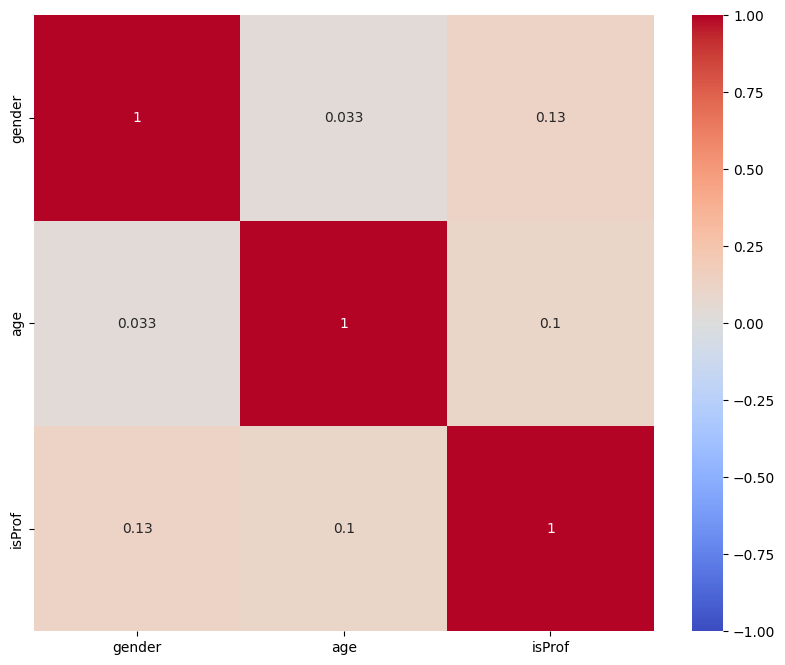

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

label_df = pd.DataFrame(all_label_df)

label_df['gender'] = label_df['gender'].replace({'남': 1, '여': 0})
label_df['isProf'] = label_df['isProf'].replace({'전문인': 1, '일반인': 0})

correlation_matrix = label_df[['gender', 'age', 'isProf']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### Segmentation

In [ ]:
anger_segment = np.load(TRAIN_SEGMENT_PATH + 'train_anger.npz')
happy_segment = np.load(TRAIN_SEGMENT_PATH + 'train_happy.npz')
panic_segment = np.load(TRAIN_SEGMENT_PATH + 'train_panic.npz')
sadness_segment = np.load(TRAIN_SEGMENT_PATH + 'train_sadness.npz')

In [ ]:
print(len(anger_segment))
print(len(happy_segment))
print(len(panic_segment))
print(len(sadness_segment))

1500
1495
1501
1500


In [ ]:
print(anger_segment[anger_label[0]['filename']].shape)
print(anger_segment[anger_label[1]['filename']].shape)

(2208, 2944)
(2592, 4608)


In [ ]:
colors = ['purple', 'yellow', 'red', 'green', 'blue', 'orange']
cmap = ListedColormap(colors)

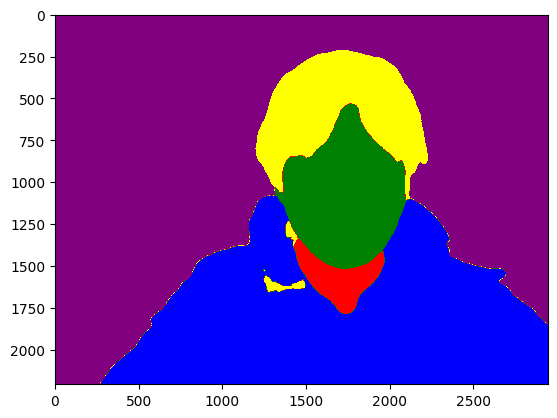

In [ ]:
plt.imshow(anger_segment[anger_label[0]['filename']], cmap=cmap, vmin=0, vmax=5)

In [ ]:
anger_segment[anger_label[0]['filename']]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4],
       [0, 0, 0, ..., 4, 4, 4]], dtype=uint8)

## Label 데이터 검증

In [ ]:
def print_faceExp_count(counts, emotion):
    print(f"Counts for emotion '{emotion}'")
    print(f"  Zero annotation same   : {counts['zero']}")
    print(f"  One annotation same    : {counts['one']}")
    print(f"  Two annotations same   : {counts['two']}")
    print(f"  Three annotations same : {counts['three']}")
    print(f"  Sum of two, three : {counts['two'] + counts['three']}")
    print(f"  Sum of all        : {counts['zero'] + counts['one'] + counts['two'] + counts['three']}")

def verify_faceExp_consistent(label, emotion):
  counts = {'zero': 0, 'one': 0, 'two': 0, 'three': 0}
  verified_data = []

  for i in range(len(label)):
    emotion_count = 0
    for annot in ['annot_A', 'annot_B', 'annot_C']:
      if label[i][annot]['faceExp'] == emotion:
        emotion_count += 1

    if emotion_count == 1:
      counts['one'] += 1
    elif emotion_count == 2:
      counts['two'] += 1
      verified_data.append(label[i])
    elif emotion_count == 3:
      counts['three'] += 1
      verified_data.append(label[i])
    else :
      counts['zero'] += 1


  print_faceExp_count(counts, emotion)

  return verified_data

In [ ]:
verified_anger = verify_faceExp_consistent(anger_label, '분노')
verified_happy = verify_faceExp_consistent(happy_label, '기쁨')
verified_panic = verify_faceExp_consistent(panic_label, '당황')
verified_sadness = verify_faceExp_consistent(sadness_label, '슬픔')

Counts for emotion '분노'
  Zero annotation same   : 151
  One annotation same    : 231
  Two annotations same   : 398
  Three annotations same : 720
  Sum of two, three : 1118
  Sum of all        : 1500
Counts for emotion '기쁨'
  Zero annotation same   : 7
  One annotation same    : 13
  Two annotations same   : 76
  Three annotations same : 1398
  Sum of two, three : 1474
  Sum of all        : 1494
Counts for emotion '당황'
  Zero annotation same   : 170
  One annotation same    : 228
  Two annotations same   : 386
  Three annotations same : 716
  Sum of two, three : 1102
  Sum of all        : 1500
Counts for emotion '슬픔'
  Zero annotation same   : 146
  One annotation same    : 234
  Two annotations same   : 414
  Three annotations same : 706
  Sum of two, three : 1120
  Sum of all        : 1500


In [ ]:
print(len(verified_anger))
print(len(verified_happy))
print(len(verified_panic))
print(len(verified_sadness))

1118
1474
1102
1120


In [ ]:
anger = verified_anger[:1102]
happy = verified_happy[:1102]
panic = verified_panic
sadness = verified_sadness[:1102]

In [ ]:
print(len(anger))
print(len(happy))
print(len(panic))
print(len(sadness))

1102
1102
1102
1102


In [ ]:
def zero_same_data(label, emotion):
  counts = {'zero': 0, 'one': 0, 'two': 0, 'three': 0}
  zero_same_data = []

  for i in range(len(label)):
    emotion_count = 0
    for annot in ['annot_A', 'annot_B', 'annot_C']:
      if label[i][annot]['faceExp'] == emotion:
        emotion_count += 1

    if emotion_count == 1:
      counts['one'] += 1
    elif emotion_count == 2:
      counts['two'] += 1
    elif emotion_count == 3:
      counts['three'] += 1
    else :
      counts['zero'] += 1
      zero_same_data.append(label[i])

  return zero_same_data

def one_same_data(label, emotion):
  counts = {'zero': 0, 'one': 0, 'two': 0, 'three': 0}
  one_same_data = []

  for i in range(len(label)):
    emotion_count = 0
    for annot in ['annot_A', 'annot_B', 'annot_C']:
      if label[i][annot]['faceExp'] == emotion:
        emotion_count += 1

    if emotion_count == 1:
      counts['one'] += 1
      one_same_data.append(label[i])
    elif emotion_count == 2:
      counts['two'] += 1
    elif emotion_count == 3:
      counts['three'] += 1
    else :
      counts['zero'] += 1

  return one_same_data

In [ ]:
zero_happy = zero_same_data(happy_label, '기쁨')
zero_happy[1]

{'filename': 'xxjn1335371d6703771e91719e943b39153b1a75d33ab95e5e313937733e19hk7.jpg',
 'gender': '여',
 'age': 30,
 'isProf': '전문인',
 'faceExp_uploader': '기쁨',
 'bg_uploader': '도심 환경',
 'annot_A': {'boxes': {'maxX': 1501.7095146654235,
   'maxY': 1416.6990820693138,
   'minX': 895.597578693162,
   'minY': 675.59858956927},
  'faceExp': '중립',
  'bg': '도심 환경'},
 'annot_B': {'boxes': {'maxX': 1496.3098907988583,
   'maxY': 1405.1842129761724,
   'minX': 902.0550151606172,
   'minY': 584.7421034219666},
  'faceExp': '중립',
  'bg': '도심 환경'},
 'annot_C': {'boxes': {'maxX': 1495.6253924954503,
   'maxY': 1408.4377476786817,
   'minX': 903.6836405141509,
   'minY': 578.9118476786821},
  'faceExp': '상처',
  'bg': '도심 환경'}}

In [ ]:
one_happy = one_same_data(happy_label, '기쁨')
one_happy[5]

{'filename': 'o3in6970e07f3180015d39ee8057fbe21a30d129907399256b881f3751b9aei1j.jpg',
 'gender': '여',
 'age': 40,
 'isProf': '일반인',
 'faceExp_uploader': '기쁨',
 'bg_uploader': '숙박 및 거주공간',
 'annot_A': {'boxes': {'maxX': 1514.8306,
   'maxY': 1037.7047,
   'minX': 883.17487,
   'minY': 173.07979999999998},
  'faceExp': '기쁨',
  'bg': '숙박 및 거주공간'},
 'annot_B': {'boxes': {'maxX': 1502.9761544299538,
   'maxY': 1047.1407987070381,
   'minX': 892.6423116902408,
   'minY': 139.75835136853664},
  'faceExp': '기쁨',
  'bg': '숙박 및 거주공간'},
 'annot_C': {'boxes': {'maxX': 1514.8306000000002,
   'maxY': 1044.8701887314303,
   'minX': 883.17487,
   'minY': 180.24528873143032},
  'faceExp': '불안',
  'bg': '숙박 및 거주공간'}}